<a href="https://colab.research.google.com/github/EugenHotaj/pytorch-generative/blob/master/notebooks/__draft__gaussian_processes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import spatial

In [99]:
def sausage_plot(X, Y, mu, sigma):
    """Plots samples from a 1D Gaussian process with mean and credible intervals."""
    plt.figure(figsize=(20, 4))

    # Set axis limits.
    plt.xlim(X.min(), X.max())
    y_max = np.abs(Y).max()
    plt.ylim(-y_max - .5, y_max + .5)

    # Plot mean and credible intervals.
    bound = 1.96 * np.diagonal(sigma)
    plt.fill_between(X, mu - bound, mu + bound, facecolor='lightblue')
    plt.plot(X, mu)

    # Plot samples.
    for i in range(Y.shape[0]): 
        plt.plot(X, Y[i, :])

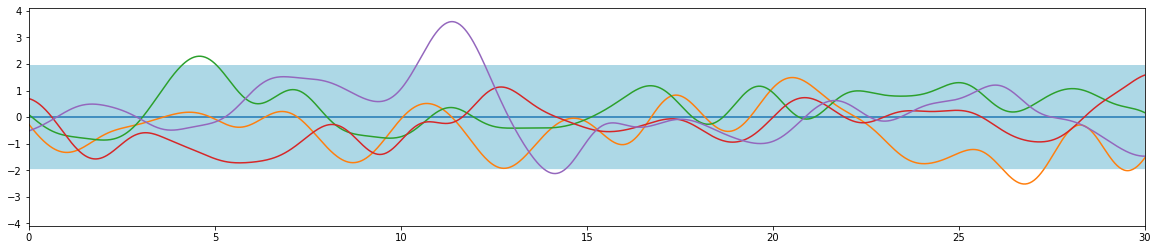

In [100]:
N, K = 1000, 4

def kernel(x):
    return np.exp(-.5 * spatial.distance.cdist(x, x, 'cityblock')**2)

def sample(x):
    mu = np.zeros(N)
    sigma = kernel(x)
    samples = np.random.multivariate_normal(mean=mu, cov=sigma, size=K)
    return mu, sigma, samples

X = np.linspace(0, 30, N)
mu, sigma, Y = sample(X.reshape(-1, 1))

sausage_plot(X, Y, mu, sigma)